## Observations and Insights 

## Based on the box plots for final tumor volumes, Capomulin seems to be comparable to Ramicane

## The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.It is a strong postive correlation, when the mouse weight increases the average tumor volume also increase.

## Infubinol had the single outlier in final tumor volume. This tells us the study results are reliable. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
testing_data_complete=pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
testing_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count= len(testing_data_complete["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
from dataclasses import dataclass


duplicate_data_df=testing_data_complete[testing_data_complete.duplicated(["Mouse ID","Timepoint"])]

duplicate_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = testing_data_complete.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count= len(clean_data["Mouse ID"].unique())
mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = clean_data.groupby("Drug Regimen")

tumor_Mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_Median = summary_df["Tumor Volume (mm3)"].median()
tumor_StDev = summary_df["Tumor Volume (mm3)"].std()
tumor_SEM = summary_df["Tumor Volume (mm3)"].sem()

summary_grouped_df = pd.DataFrame({"Mean": tumor_Mean, "Median": tumor_Median,
                                   "Standard Deviation": tumor_StDev, "SEM": tumor_SEM})
summary_grouped_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["min",
                                               "max",
                                               "sum",
                                               "count",
                                               "mean"]})


Tumor Volume (mm3)                                          
                            min        max           sum count       mean
Drug Regimen                                                             
Capomulin             23.343598  48.158209   9355.420462   230  40.675741
Ceftamin              45.000000  68.923185   9361.228582   178  52.591172
Infubinol             36.321346  72.226731   9413.493529   178  52.884795
Ketapril              45.000000  78.567014  10384.299876   188  55.235638
Naftisol              45.000000  76.668817  10105.671026   186  54.331565
Placebo               45.000000  73.212939   9780.078122   181  54.033581
Propriva              45.000000  72.455421   8173.380288   156  52.393463
Ramicane              22.050126  47.622816   9169.417875   228  40.216745
Stelasyn              45.000000  75.123690   9816.199991   181  54.233149
Zoniferol             45.000000  73.324432   9689.044192   182  53.236507

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

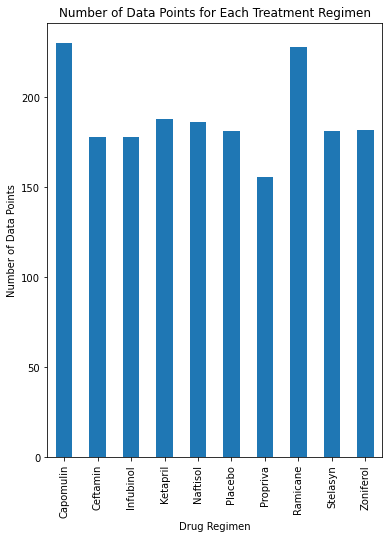

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_value= clean_data.groupby("Drug Regimen")

timepoints_count=regimen_value["Timepoint"].count()

time_bar= timepoints_count.plot(kind="bar", figsize=(6,8))

time_bar.set_xlabel("Drug Regimen")
time_bar.set_ylabel("Number of Data Points")
time_bar.set_title("Number of Data Points for Each Treatment Regimen")


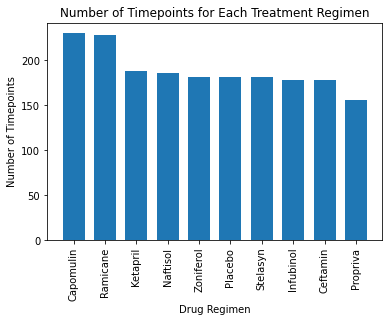

In [10]:
# Calculate the amount of data points for each drug regimen
counts = clean_data["Drug Regimen"].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,counts.index.values)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for Each Treatment Regimen")

plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, '')

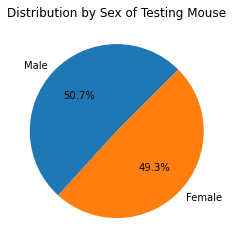

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Identify distribution of data by sex
data = clean_data['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=45, title="Distribution by Sex of Testing Mouse")

# Hide the 'y' label
pie_plot.set_ylabel('')

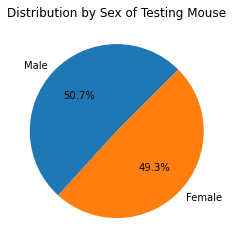

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=45)
plt.title("Distribution by Sex of Testing Mouse")

# Display resulting plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mous

# Merge max timepoint onto data_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timpepoint_df = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timpepoint_df

merged_df = pd.merge(clean_data, max_timpepoint_df, on='Mouse ID')
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

for drug in drugs:
    drug_df=merged_df.loc[merged_df["Drug Regimen"]==drug]
    last_volume_df= drug_df.loc[drug_df["Timepoint"]== drug_df["max_timepoint"]]
    T_volumes =last_volume_df["Tumor Volume (mm3)"]
    drug_values.append(T_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    quartiles = T_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


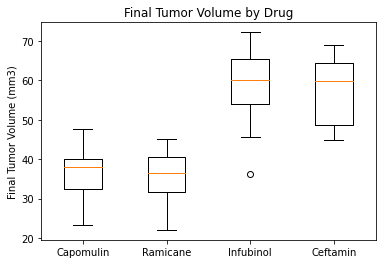

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

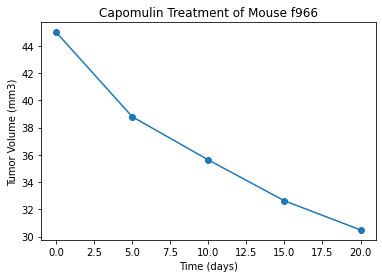

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = clean_data.loc[clean_data['Mouse ID'] == 'f966']
plt.plot(mouse["Timepoint"], mouse['Tumor Volume (mm3)'], marker = 'o')

#labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse f966")

plt.show()

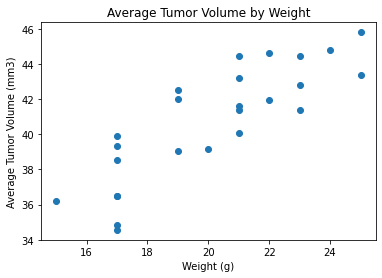

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['avg_tumor_vol', 'Weight (g)']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


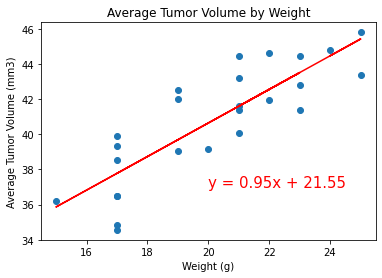

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()